<a id="6"></a>
<h2 style="background-color: #3498db; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Indie Flower', cursive; font-weight: bold; margin: 10px; border: 2px solid #2980b9; border-radius: 12px; padding: 15px;">Step 1. Imports</h2>


*   Import modules
*   Load dataframe



In [1]:
# Main Modules
import numpy as np
import pandas as pd
import seaborn as sns
import warnings 
import plotly.express as px
from matplotlib import pyplot as plt 

# Classifier Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import  BernoulliNB
from xgboost import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Accuracy Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score, roc_auc_score, log_loss, mean_absolute_error, mean_squared_error, r2_score

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\CSV_Files\HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



## <p style="background-color: #e67e22; font-size: 20px; color: #ffffff; text-align: center; font-family: 'Zilla Slab', serif; font-weight: bold; margin: 15px; border: 3px solid #d35400; border-radius: 15px; padding: 20px;">Step 2. Data Cleaning</p>

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers, consistency) 



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


from info of the data we can conclude that there is no nulls & the datatypes are suitable 

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


from describtion of the data we can conclude that range of the values are good

In [5]:
df.rename(columns={'average_montly_hours':'average_monthly_hours','Work_accident':'work_accident','time_spend_company':'time_spend_company_years'},inplace=True)
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company_years', 'work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df.duplicated().sum()

3008

In [7]:
df.drop_duplicates(keep='last',inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.isnull().sum()

satisfaction_level          0
last_evaluation             0
number_project              0
average_monthly_hours       0
time_spend_company_years    0
work_accident               0
left                        0
promotion_last_5years       0
Department                  0
salary                      0
dtype: int64

In [10]:
numeric_columns=df.select_dtypes(include=np.number).columns
categorical_columns=df.select_dtypes(include='object').columns
numeric_columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company_years', 'work_accident',
       'left', 'promotion_last_5years'],
      dtype='object')

In [11]:
categorical_columns

Index(['Department', 'salary'], dtype='object')

<Axes: >

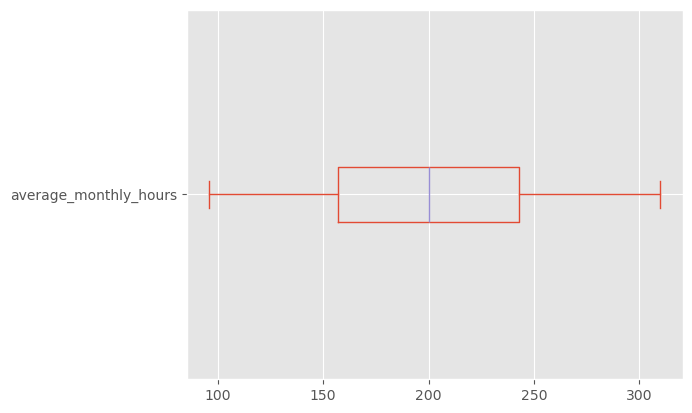

In [12]:
df['average_monthly_hours'].plot(kind='box',vert=False) # no outliers

<a id="10"></a>
<h1 style="background-color: #3498db; font-size: 20px; color: #ecf0f1; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #2980b9; border-radius: 8px; padding: 15px;">Step 2. Data Exploration (Continue EDA)</h1>


Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
df['number_project']=df['number_project'].astype('category')
df['time_spend_company_years']=df['time_spend_company_years'].astype('category')
df['work_accident']=df['work_accident'].astype('category')
df['promotion_last_5years']=df['promotion_last_5years'].astype('category')
df['left']=df['left'].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 783 to 14998
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   satisfaction_level        11991 non-null  float64 
 1   last_evaluation           11991 non-null  float64 
 2   number_project            11991 non-null  category
 3   average_monthly_hours     11991 non-null  int64   
 4   time_spend_company_years  11991 non-null  category
 5   work_accident             11991 non-null  category
 6   left                      11991 non-null  category
 7   promotion_last_5years     11991 non-null  category
 8   Department                11991 non-null  object  
 9   salary                    11991 non-null  object  
dtypes: category(5), float64(2), int64(1), object(2)
memory usage: 621.6+ KB


i convert all of these to category just for simplify analysis

Text(0.5, 1.0, 'Box Plot for satisfaction_level')

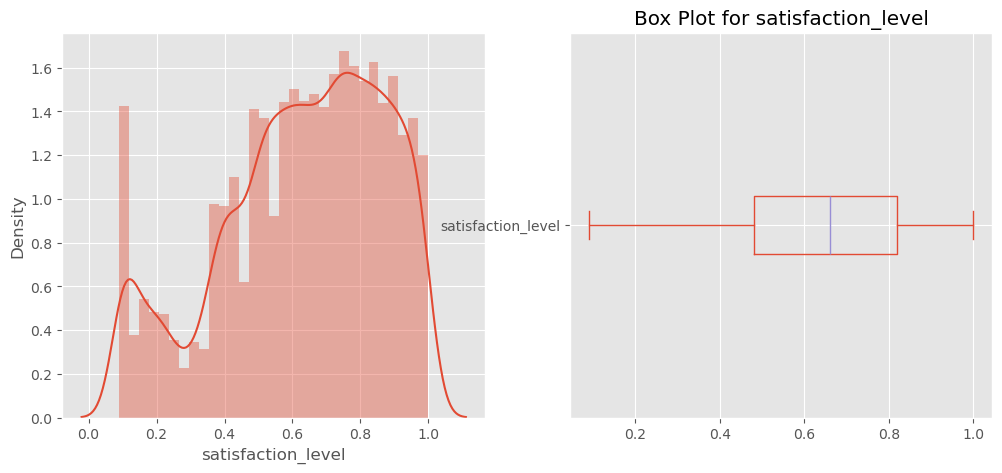

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['satisfaction_level'])
plt.subplot(1,2,2)
df['satisfaction_level'].plot(kind='box',vert=False)
plt.title('Box Plot for satisfaction_level')

In [16]:
df['satisfaction_level'].skew()

-0.5387016649389444

In [17]:
len(df[df['satisfaction_level']>0.5])/df.shape[0]

0.7177883412559419

In [18]:
1-len(df[df['satisfaction_level']>0.5])/df.shape[0]

0.28221165874405807

<Axes: xlabel='satisfaction_level', ylabel='Count'>

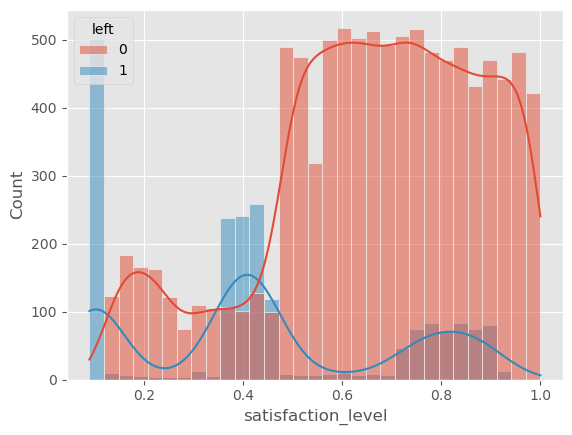

In [19]:
sns.histplot(data=df,x='satisfaction_level',hue='left',kde=True)

<Axes: xlabel='satisfaction_level', ylabel='number_project'>

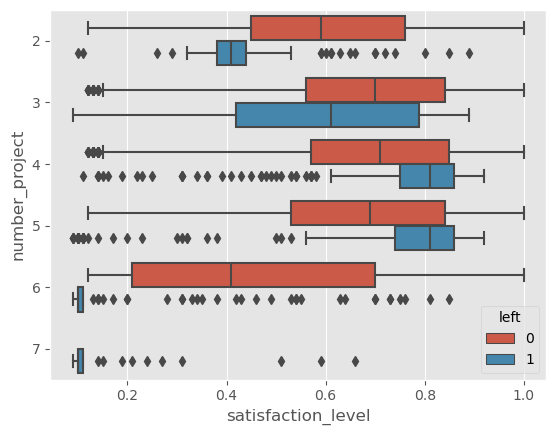

In [20]:
sns.boxplot(data=df,x='satisfaction_level',y='number_project',hue='left')

In [21]:
first_left=df[(df['satisfaction_level']<0.2) & (df['left']==1)]

In [22]:
first_left['number_project'].value_counts(normalize=True)

number_project
6    0.661538
7    0.265385
5    0.048077
4    0.013462
3    0.007692
2    0.003846
Name: proportion, dtype: float64

In [23]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company_years', 'work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [24]:
first_left['last_evaluation'].describe()

count    520.000000
mean       0.864115
std        0.076840
min        0.470000
25%        0.820000
50%        0.870000
75%        0.922500
max        1.000000
Name: last_evaluation, dtype: float64

In [25]:
first_left['average_monthly_hours'].describe()

count    520.000000
mean     273.709615
std       26.418054
min      136.000000
25%      258.000000
50%      276.000000
75%      292.250000
max      310.000000
Name: average_monthly_hours, dtype: float64

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

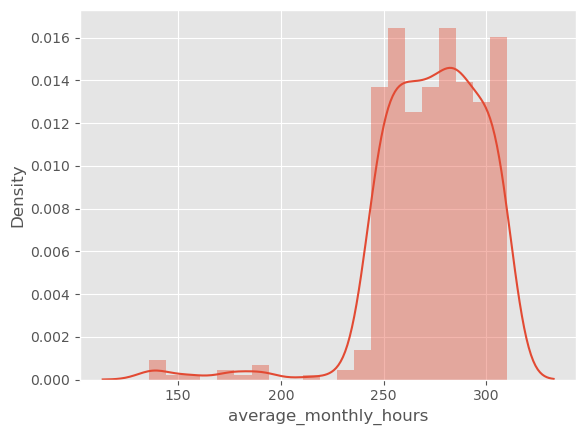

In [26]:
sns.distplot(first_left['average_monthly_hours'])

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

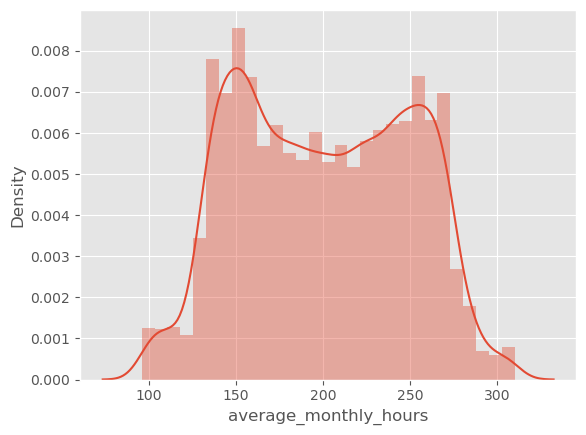

In [27]:
sns.distplot(df['average_monthly_hours'])

In [28]:
first_left['time_spend_company_years'].value_counts()

time_spend_company_years
4     448
5      60
3       8
2       4
6       0
7       0
8       0
10      0
Name: count, dtype: int64

In [29]:
df['time_spend_company_years'].value_counts()

time_spend_company_years
3     5190
2     2910
4     2005
5     1062
6      542
10     107
7       94
8       81
Name: count, dtype: int64

In [30]:
first_left['promotion_last_5years'].value_counts()

promotion_last_5years
0    519
1      1
Name: count, dtype: int64

In [31]:
first_left['Department'].value_counts()

Department
sales          130
technical      117
support         80
IT              47
accounting      32
hr              28
RandD           26
marketing       23
product_mng     23
management      14
Name: count, dtype: int64

In [32]:
first_left['salary'].value_counts()

salary
low       302
medium    207
high       11
Name: count, dtype: int64

Text(0.5, 0, 'Count')

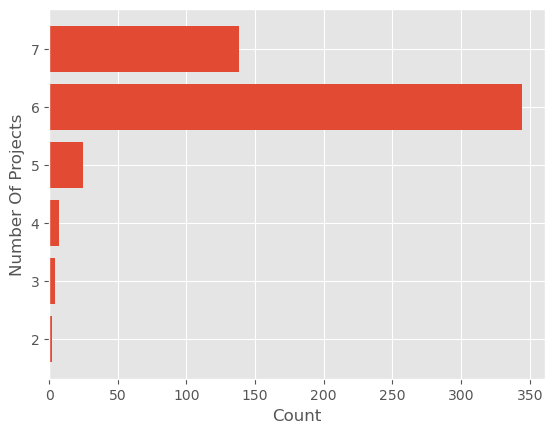

In [33]:
index = first_left['number_project'].value_counts().index
values = first_left['number_project'].value_counts().values
plt.barh(index,values)
plt.ylabel('Number Of Projects')
plt.xlabel('Count')

Text(0.5, 0, 'Count')

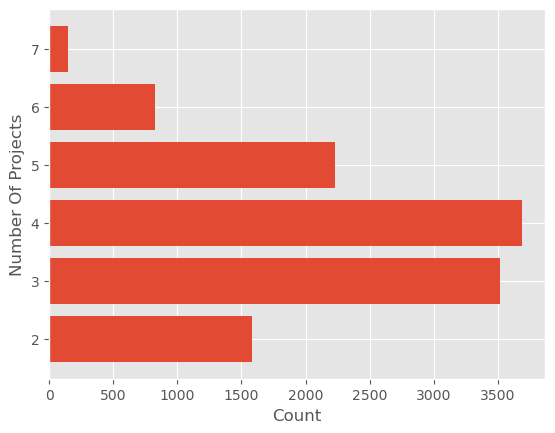

In [34]:
index = df['number_project'].value_counts().index
values = df['number_project'].value_counts().values
plt.barh(index,values)
plt.ylabel('Number Of Projects')
plt.xlabel('Count')

In [35]:
second_left=df[(df['satisfaction_level']>0.25) & (df['left']==1) & (df['satisfaction_level']<0.5)]

In [36]:
second_left.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company_years,work_accident,left,promotion_last_5years,Department,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low
795,0.43,0.54,2,150,3,0,1,0,hr,low
796,0.45,0.49,2,151,3,0,1,0,hr,low


In [37]:
second_left['last_evaluation'].describe()

count    883.000000
mean       0.522458
std        0.071611
min        0.450000
25%        0.480000
50%        0.510000
75%        0.550000
max        1.000000
Name: last_evaluation, dtype: float64

In [38]:
second_left['number_project'].value_counts()

number_project
2    839
4     14
3     11
6     11
5      6
7      2
Name: count, dtype: int64

In [39]:
second_left['average_monthly_hours'].describe()

count    883.000000
mean     148.281993
std       24.942991
min      126.000000
25%      135.000000
50%      145.000000
75%      154.000000
max      310.000000
Name: average_monthly_hours, dtype: float64

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

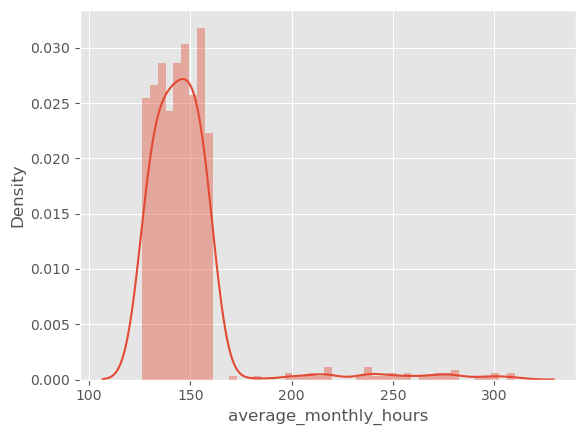

In [40]:
sns.distplot(second_left['average_monthly_hours'])

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

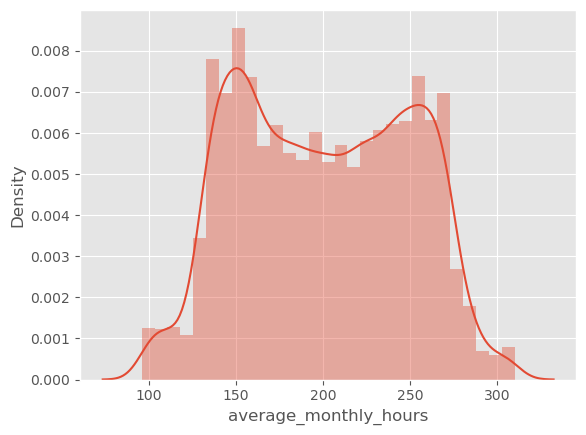

In [41]:
sns.distplot(df['average_monthly_hours'])

Text(0, 0.5, 'Number Of Projects')

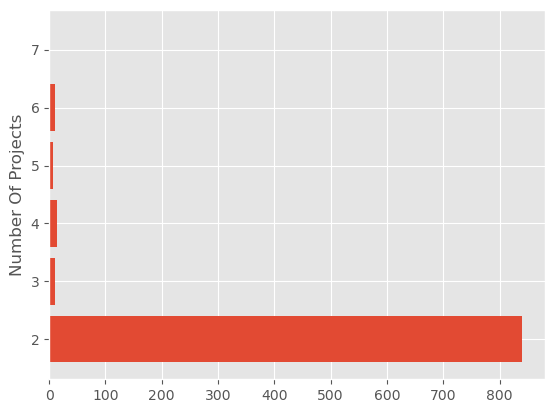

In [42]:
index = second_left['number_project'].value_counts().index
value = second_left['number_project'].value_counts().values 
plt.barh(index,value)
plt.ylabel('Number Of Projects')

Text(0, 0.5, 'time_spend_company_years')

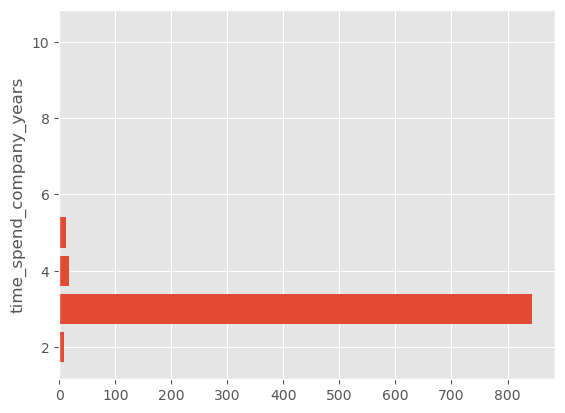

In [43]:
index = second_left['time_spend_company_years'].value_counts().index
value = second_left['time_spend_company_years'].value_counts().values 
plt.barh(index,value)
plt.ylabel('time_spend_company_years')

In [44]:
second_left['work_accident'].value_counts()

work_accident
0    836
1     47
Name: count, dtype: int64

In [45]:
second_left['salary'].value_counts()

salary
low       528
medium    330
high       25
Name: count, dtype: int64

In [46]:
second_left['promotion_last_5years'].value_counts()

promotion_last_5years
0    878
1      5
Name: count, dtype: int64

In [47]:
second_left['Department'].value_counts()

Department
sales          258
technical      159
support        128
IT              69
hr              58
marketing       57
product_mng     52
accounting      47
RandD           32
management      23
Name: count, dtype: int64

Text(0, 0.5, 'Department')

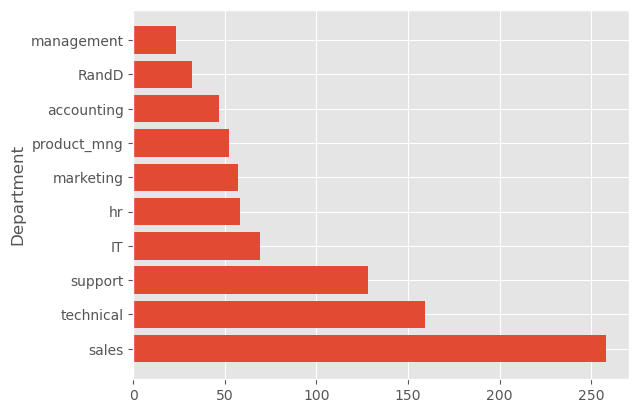

In [48]:
index = second_left['Department'].value_counts().index
value = second_left['Department'].value_counts().values 
plt.barh(index,value)
plt.ylabel('Department')

In [49]:
third_left=df[(df['satisfaction_level']>0.65) & (df['left']==1) & (df['satisfaction_level']<0.9)]

In [50]:
third_left.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company_years,work_accident,left,promotion_last_5years,Department,salary
785,0.85,0.99,5,248,5,0,1,0,sales,low
786,0.78,0.93,5,225,5,0,1,0,sales,low
788,0.78,0.81,3,222,2,0,1,0,sales,low
802,0.85,0.82,5,264,6,0,1,0,technical,medium
804,0.81,0.95,5,266,5,0,1,0,technical,medium


<Axes: xlabel='last_evaluation', ylabel='Density'>

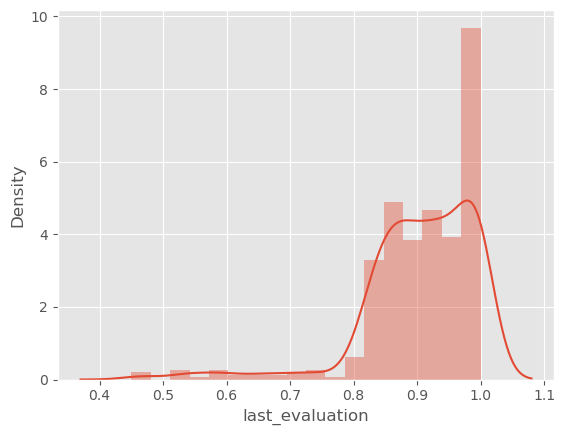

In [51]:
sns.distplot(third_left['last_evaluation'])

In [52]:
third_left['number_project'].value_counts()

number_project
5    267
4    175
3     17
2      8
6      8
7      1
Name: count, dtype: int64

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

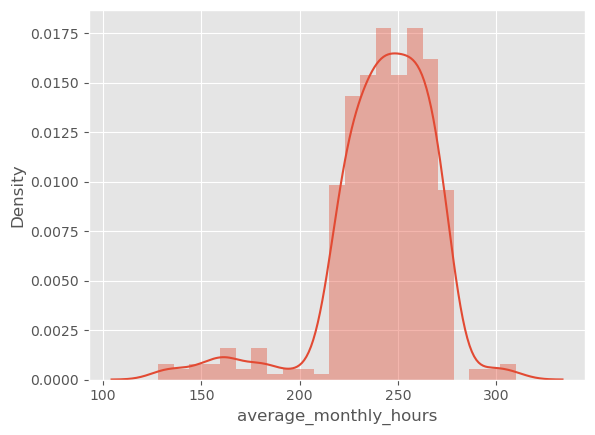

In [53]:
sns.distplot(third_left['average_monthly_hours'])

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

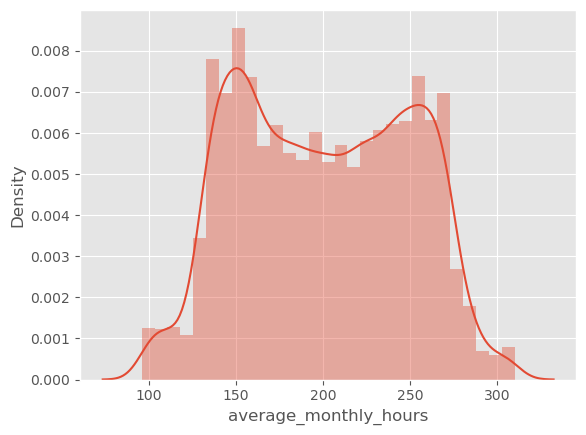

In [54]:
sns.distplot(df['average_monthly_hours'])

In [55]:
third_left['time_spend_company_years'].value_counts()

time_spend_company_years
5     357
6      85
3      12
4      12
2      10
7       0
8       0
10      0
Name: count, dtype: int64

In [56]:
third_left['promotion_last_5years'].value_counts()

promotion_last_5years
0    474
1      2
Name: count, dtype: int64

In [57]:
third_left['salary'].value_counts()

salary
low       274
medium    192
high       10
Name: count, dtype: int64

In [58]:
third_left['Department'].value_counts()

Department
sales          130
support         89
technical       85
IT              34
product_mng     32
marketing       27
RandD           23
accounting      22
hr              20
management      14
Name: count, dtype: int64

<Axes: >

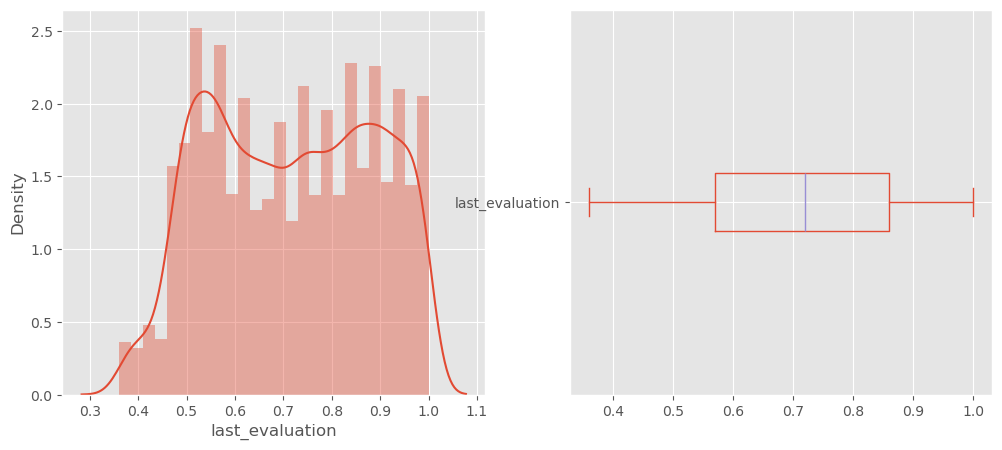

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df['last_evaluation'])
plt.subplot(1,2,2)
df['last_evaluation'].plot(kind='box',vert=False)

<Axes: xlabel='last_evaluation', ylabel='Count'>

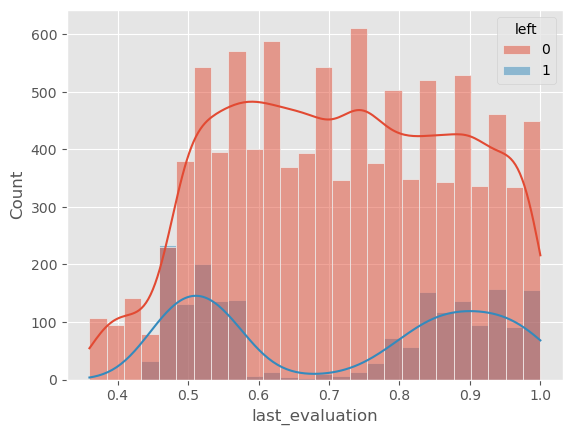

In [60]:
sns.histplot(data=df,x='last_evaluation',hue='left',kde=True)

In [61]:
df['last_evaluation'].skew()

-0.031686075200588235

In [62]:
a_group = df[(df['last_evaluation']>0.4) & (df['last_evaluation']<0.6) & (df['left']==1)]

In [63]:
a_group.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company_years', 'work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [64]:
a_group['number_project'].value_counts()

number_project
2    838
4     11
3      8
5      8
7      6
6      5
Name: count, dtype: int64

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

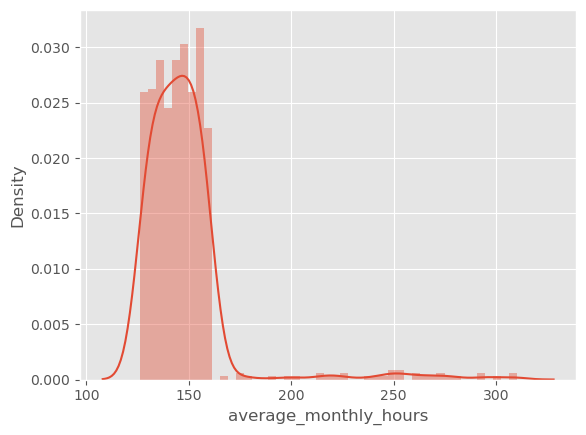

In [65]:
sns.distplot(a_group['average_monthly_hours'])

<Axes: xlabel='average_monthly_hours', ylabel='Density'>

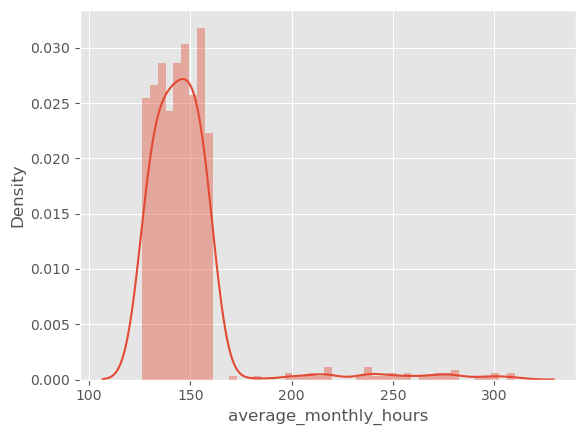

In [66]:
sns.distplot(second_left['average_monthly_hours'])

In [67]:
df['number_project'].value_counts()

number_project
4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: count, dtype: int64

AttributeError: 'int' object has no attribute 'startswith'

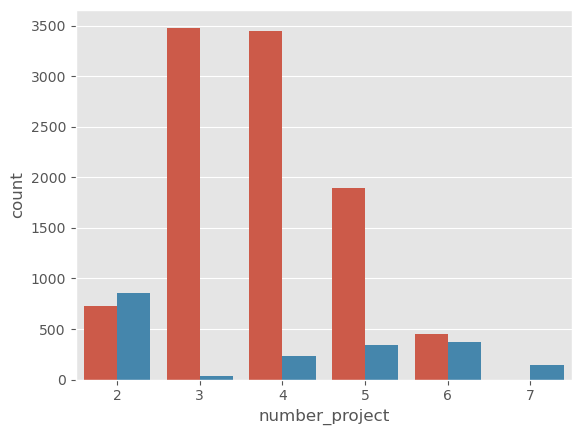

In [68]:
sns.countplot(data=df,x='number_project',hue='left')

In [69]:
x=df[(df['number_project']==2) & (df['left']==1)]
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company_years,work_accident,left,promotion_last_5years,Department,salary
783,0.36,0.46,2,132,3,0,1,0,sales,low
784,0.44,0.57,2,131,3,0,1,0,sales,low
787,0.39,0.46,2,156,3,0,1,0,sales,low
795,0.43,0.54,2,150,3,0,1,0,hr,low
796,0.45,0.49,2,151,3,0,1,0,hr,low


<Axes: xlabel='average_monthly_hours', ylabel='Density'>

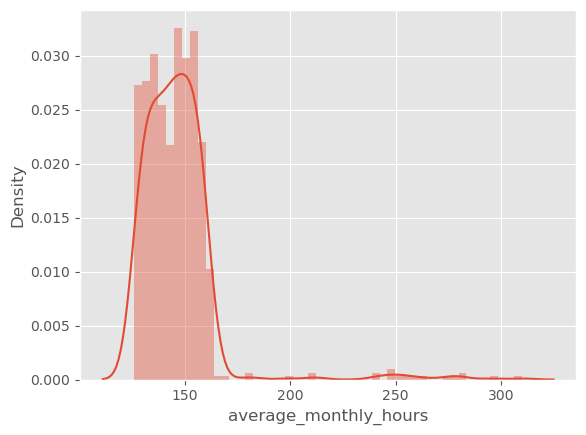

In [70]:
sns.distplot(x['average_monthly_hours'])

In [71]:
df[(df['number_project']==7) ]['left'].value_counts()

left
1    145
0      0
Name: count, dtype: int64

In [72]:
x = df[(df['number_project']==7)]

In [73]:
x.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company_years,work_accident,left,promotion_last_5years,Department,salary
794,0.11,0.79,7,295,4,0,1,0,hr,low
809,0.11,0.97,7,310,4,0,1,0,support,medium
811,0.09,0.97,7,288,4,0,1,0,support,medium
814,0.10,0.92,7,253,4,1,1,0,support,low
820,0.11,0.93,7,284,4,0,1,0,technical,low


<Axes: xlabel='average_monthly_hours', ylabel='Density'>

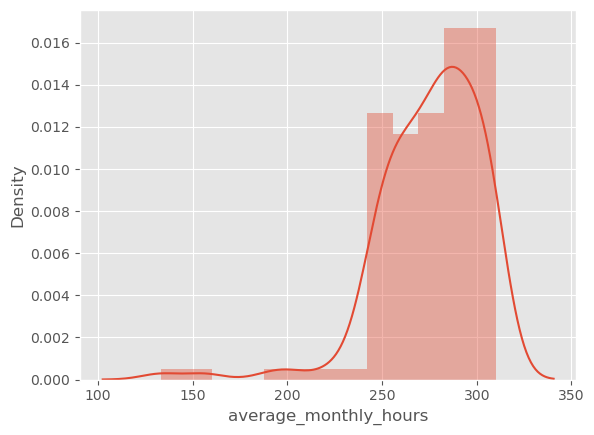

In [74]:
sns.distplot(x['average_monthly_hours'])

In [75]:
x['promotion_last_5years'].value_counts()

promotion_last_5years
0    145
1      0
Name: count, dtype: int64

In [76]:
x['salary'].value_counts()

salary
low       82
medium    61
high       2
Name: count, dtype: int64

<Axes: xlabel='average_monthly_hours', ylabel='Count'>

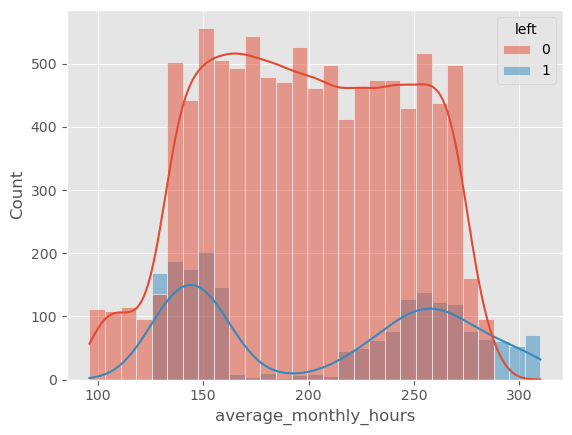

In [77]:
sns.histplot(data=df,x='average_monthly_hours',hue='left',kde=True)

b_group = df[(df['average_monthly_hours']>200) & (df['average_monthly_hours']<300) & (df['left']==1)]
b_group.head()

In [78]:
b_group['satisfaction_level'].describe()

NameError: name 'b_group' is not defined

<Axes: xlabel='Department', ylabel='count'>

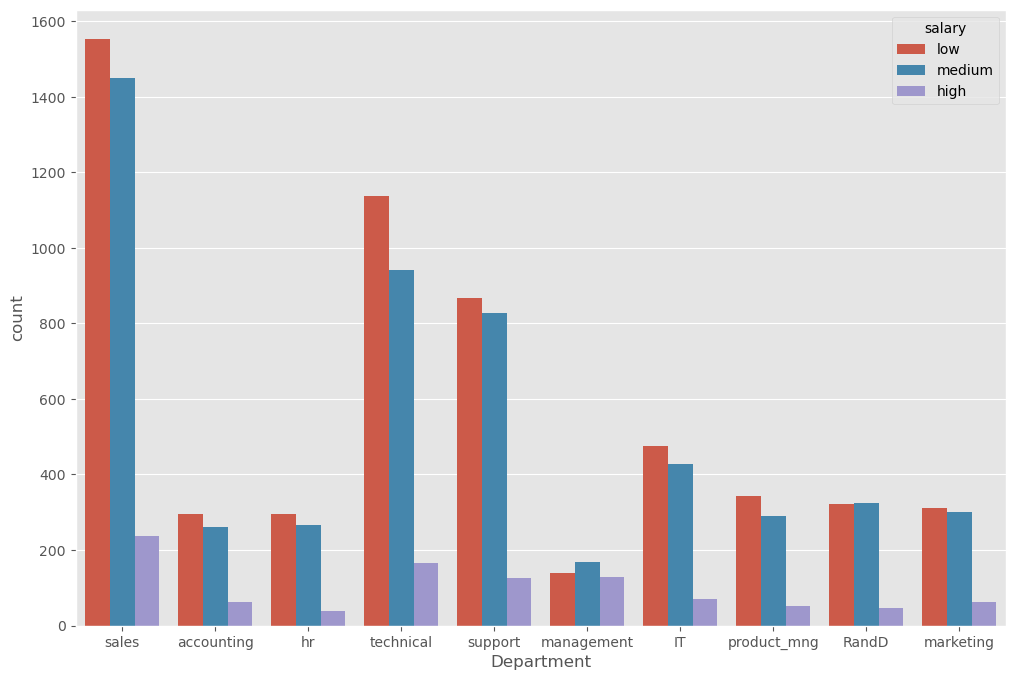

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Department',hue='salary')

AttributeError: 'int' object has no attribute 'startswith'

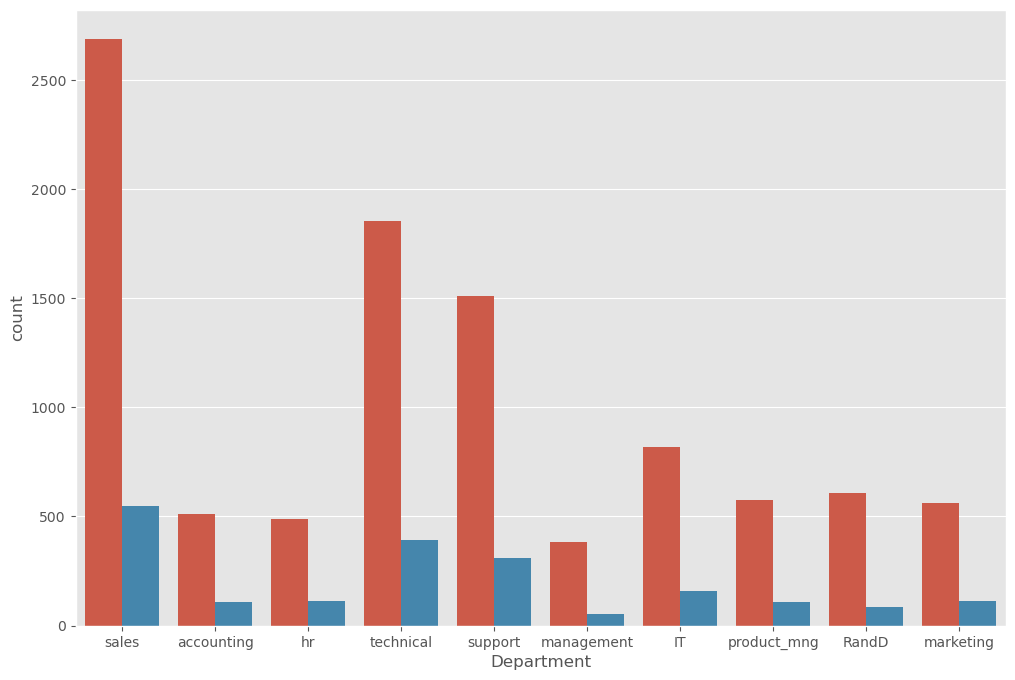

In [80]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x='Department',hue='left')

The most Department has number of left persons : sales - technical

AttributeError: 'int' object has no attribute 'startswith'

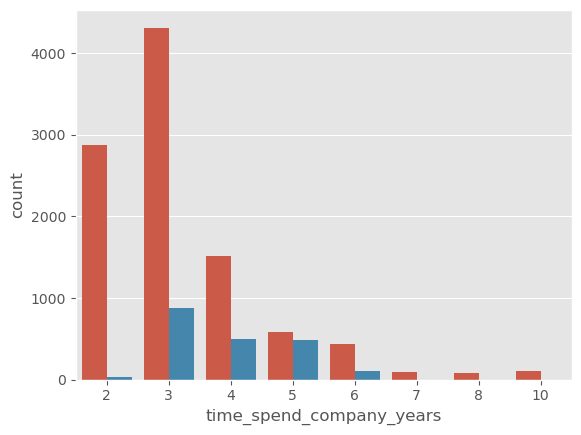

In [81]:
sns.countplot(data=df,x='time_spend_company_years',hue='left')

In [ ]:
df.columns

In [82]:
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

Text(0.5, 0, 'left')

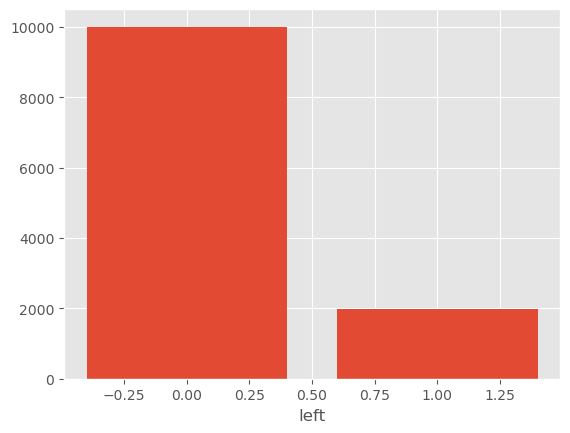

In [83]:
index  =  df['left'].value_counts().index
values = df['left'].value_counts().values 
plt.bar(index,values)
plt.xlabel('left') # imbalnced data set

In [84]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

<BarContainer object of 2 artists>

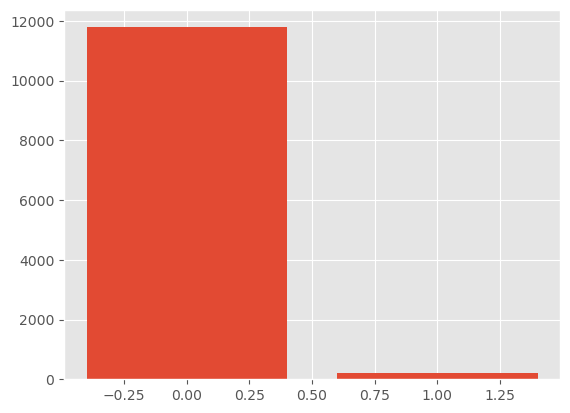

In [85]:
index  =  df['promotion_last_5years'].value_counts().index
values = df['promotion_last_5years'].value_counts().values 
plt.bar(index,values) #most of people doesnot has promotion 

AttributeError: 'int' object has no attribute 'startswith'

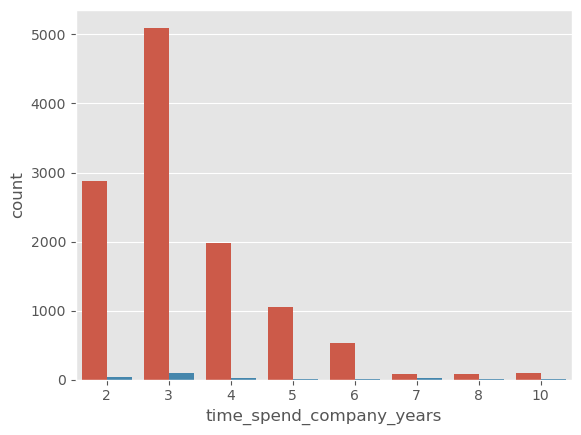

In [86]:
sns.countplot(data=df,x='time_spend_company_years',hue='promotion_last_5years')

In [87]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company_years', 'work_accident',
       'left', 'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [88]:
df['work_accident'].value_counts()

work_accident
0    10141
1     1850
Name: count, dtype: int64

<BarContainer object of 2 artists>

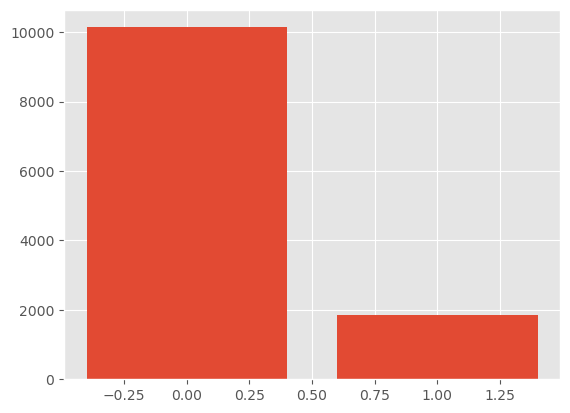

In [89]:
plt.bar(df['work_accident'].value_counts().index,df['work_accident'].value_counts().values)

AttributeError: 'int' object has no attribute 'startswith'

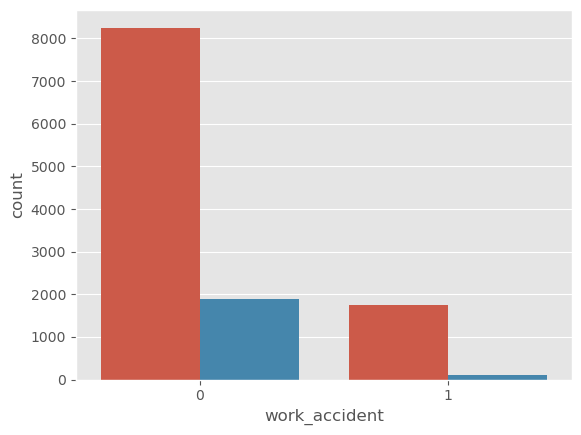

In [90]:
sns.countplot(data=df,x='work_accident',hue='left')

from the graph above we can conclude that people work accident isnot a good indicator for left or not :)

In [95]:
df['promotion_last_5years'].value_counts()

promotion_last_5years
0    11788
1      203
Name: count, dtype: int64

AttributeError: 'int' object has no attribute 'startswith'

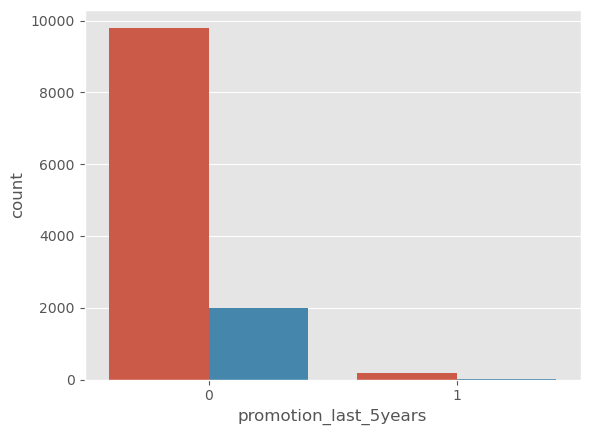

In [96]:
sns.countplot(data=df,x='promotion_last_5years',hue='left')

from the graph we can conclude that promotion is a good indicator that most of poeple left has no promotion

AttributeError: 'int' object has no attribute 'startswith'

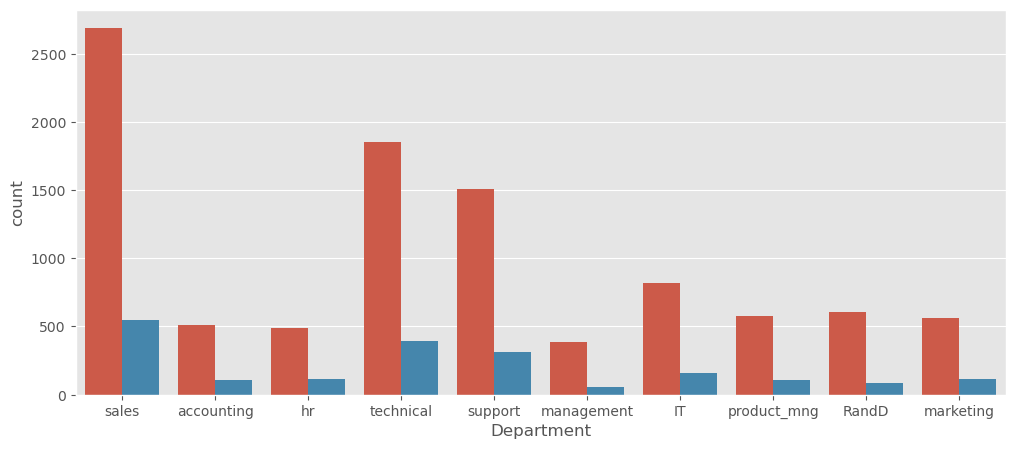

In [97]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Department',hue='left')

AttributeError: 'int' object has no attribute 'startswith'

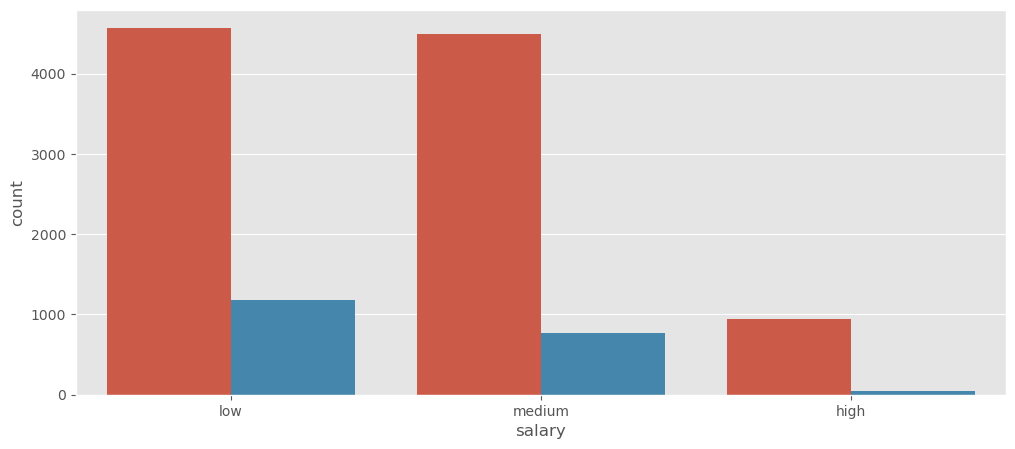

In [98]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='salary',hue='left')

salary is a good indicator that most of poeple has left has low and meduim salaries

In [99]:
df[numeric_columns].corr()['left']

KeyError: "['work_accident'] not in index"

In [102]:
df.drop('work_accident',axis=1,inplace=True)

KeyError: "['work_accident'] not found in axis"

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 783 to 14998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   satisfaction_level        11991 non-null  float64 
 1   last_evaluation           11991 non-null  float64 
 2   number_project            11991 non-null  category
 3   average_monthly_hours     11991 non-null  int64   
 4   time_spend_company_years  11991 non-null  category
 5   left                      11991 non-null  category
 6   promotion_last_5years     11991 non-null  category
 7   salary                    11991 non-null  object  
dtypes: category(4), float64(2), int64(1), object(1)
memory usage: 516.1+ KB


In [104]:
df.drop('Department',axis=1,inplace=True)

KeyError: "['Department'] not found in axis"

In [105]:
for col in df.columns:
    if df[col].dtype=='category':
        df[col] = df[col].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 783 to 14998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        11991 non-null  float64
 1   last_evaluation           11991 non-null  float64
 2   number_project            11991 non-null  int32  
 3   average_monthly_hours     11991 non-null  int64  
 4   time_spend_company_years  11991 non-null  int32  
 5   left                      11991 non-null  int32  
 6   promotion_last_5years     11991 non-null  int32  
 7   salary                    11991 non-null  object 
dtypes: float64(2), int32(4), int64(1), object(1)
memory usage: 655.8+ KB


In [106]:
df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [107]:
df['salary']=df['salary'].map({'low':3,'medium':2,'high':1})
df['salary']

783      3
784      3
785      3
786      3
787      3
        ..
14994    3
14995    3
14996    3
14997    3
14998    3
Name: salary, Length: 11991, dtype: int64

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 783 to 14998
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   satisfaction_level        11991 non-null  float64
 1   last_evaluation           11991 non-null  float64
 2   number_project            11991 non-null  int32  
 3   average_monthly_hours     11991 non-null  int64  
 4   time_spend_company_years  11991 non-null  int32  
 5   left                      11991 non-null  int32  
 6   promotion_last_5years     11991 non-null  int32  
 7   salary                    11991 non-null  int64  
dtypes: float64(2), int32(4), int64(2)
memory usage: 655.8 KB


In [109]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company_years,left,promotion_last_5years,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.166041,0.016929,2.39613
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.00000
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,2.00000
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,2.00000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,3.00000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,3.00000


In [110]:
df['average_monthly_hours']=df['average_monthly_hours'].apply(lambda x : (x-df['average_monthly_hours'].mean())/df['average_monthly_hours'].std())
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company_years,left,promotion_last_5years,salary
count,11991.000000,11991.000000,11991.000000,1.199100e+04,11991.000000,11991.000000,11991.000000,11991.00000
mean,0.629658,0.716683,3.802852,-2.453212e-16,3.364857,0.166041,0.016929,2.39613
std,0.241070,0.168343,1.163238,1.000000e+00,1.330240,0.372133,0.129012,0.63590
min,0.090000,0.360000,2.000000,-2.144022e+00,2.000000,0.000000,0.000000,1.00000
25%,0.480000,0.570000,3.000000,-8.921706e-01,3.000000,0.000000,0.000000,2.00000
50%,0.660000,0.720000,4.000000,-9.717691e-03,3.000000,0.000000,0.000000,2.00000
75%,0.820000,0.860000,5.000000,8.727352e-01,4.000000,0.000000,0.000000,3.00000
max,1.000000,1.000000,7.000000,2.247720e+00,10.000000,1.000000,1.000000,3.00000


<a id="10"></a>
<h1 style="background-color: #3498db; font-size: 20px; color: #ecf0f1; text-align: center; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; font-weight: bold; margin: 10px; border: 1px solid; border-color: #2980b9; border-radius: 8px; padding: 15px;">Step 3. Model </h1>




Applying Logistic Regression

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
X=df.drop('left',axis=1)
y=df['left']
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
logreg = LogisticRegression(max_iter=1000)

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # note: 'elasticnet' requires 'solver' to be 'saga'
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'saga']
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

In [112]:
best_params

{'C': 0.03359818286283781, 'penalty': 'l1', 'solver': 'saga'}

In [113]:
log_reg = LogisticRegression(**best_params)
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

0.8420175072947061

In [114]:
log_reg.score(X_train,y_train)

0.8331943286071727

In [115]:
y_pred = log_reg.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[1954,   59],
       [ 320,   66]], dtype=int64)

In [116]:
recall_score(y_test,y_pred)

0.17098445595854922

In [117]:
accuracy_score(y_test,y_pred)

0.8420175072947061

In [118]:
precision_score(y_test,y_pred)

0.528

In [119]:
f1_score(y_test,y_pred)

0.2583170254403131

In [120]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.97      0.91      2013\n           1       0.53      0.17      0.26       386\n\n    accuracy                           0.84      2399\n   macro avg       0.69      0.57      0.58      2399\nweighted avg       0.81      0.84      0.81      2399\n'

Applying KNN

In [121]:
# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': np.arange(1, 10),
    'weights': ['uniform', 'distance'],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best scorenb 
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'n_neighbors': 4, 'weights': 'uniform'}
Best cross-validation accuracy: 0.9724765951157434


In [123]:
knn = KNeighborsClassifier(**best_params)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9733222175906627

In [124]:
knn.score(X_train,y_train)

0.978628023352794

In [125]:
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[1990,   23],
       [  41,  345]], dtype=int64)

In [126]:
f1_score(y_test,y_pred)

0.9151193633952254

In [127]:
precision_score(y_test,y_pred)

0.9375

In [129]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.99      0.98      2013\n           1       0.94      0.89      0.92       386\n\n    accuracy                           0.97      2399\n   macro avg       0.96      0.94      0.95      2399\nweighted avg       0.97      0.97      0.97      2399\n'

In [130]:
recall_score(y_test,y_pred)

0.8937823834196891

SVC

In [135]:
svc = SVC(C=1000,kernel='rbf',random_state=101)
svc.fit(X_train,y_train)
svc.score(X_test,y_test)

0.9704043351396415

In [136]:
svc.score(X_train,y_train)

0.9747706422018348

In [137]:
y_pred=svc.predict(X_test)
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

f1_score is 0.9074315514993482
precision_score 0.9133858267716536
Recall score 0.9015544041450777


In [138]:
confusion_matrix(y_test,y_pred)

array([[1980,   33],
       [  38,  348]], dtype=int64)

DecisionTree

In [139]:
# Define the model
dt = DecisionTreeClassifier()

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11)
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best cross-validation accuracy: 0.9831106095077977


In [140]:
DT = DecisionTreeClassifier(**best_params)
DT.fit(X_train,y_train)
DT.score(X_train,y_train)

0.9862385321100917

In [141]:
DT.score(X_test,y_test)

0.9824927052938724

In [142]:
y_pred = DT.predict(X_test)
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

f1_score is 0.9440000000000001
precision_score 0.9725274725274725
Recall score 0.917098445595855


In [143]:
confusion_matrix(y_test,y_pred)

array([[2003,   10],
       [  32,  354]], dtype=int64)

Random Forest

In [144]:
# Define the model
rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.9848831263676283


In [145]:
RF = RandomForestClassifier(**best_params)
RF.fit(X_train,y_train)
RF.score(X_train,y_train)

0.9883236030025021

In [146]:
RF.score(X_test,y_test)

0.9845769070446019

In [147]:
y_pred = RF.predict(X_test)
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

f1_score is 0.9502018842530283
precision_score 0.988795518207283
Recall score 0.9145077720207254


In [148]:
confusion_matrix(y_test,y_pred)

array([[2009,    4],
       [  33,  353]], dtype=int64)

XGBoost

In [150]:
# Define the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation accuracy: {best_score}")


Best parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 50}
Best cross-validation accuracy: 0.9837364785817255


In [152]:
xgb = XGBClassifier(**best_params)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [154]:
y_pred = xgb.predict(X_test)
print(f'The score of the train is {xgb.score(X_train,y_train)}')
print(f'The score of the test is {xgb.score(X_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.9934320266889074
The score of the test is 0.9837432263443101
f1_score is 0.9477911646586344
precision_score 0.9806094182825484
Recall score 0.917098445595855


In [155]:
confusion_matrix(y_test,y_pred)

array([[2006,    7],
       [  32,  354]], dtype=int64)

CatBoost

In [157]:
# Define the model
catboost_model = CatBoostClassifier(silent=True)

# Define the parameter grid
param_grid = {
    'iterations': [100, 200, 500],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for CatBoost: {best_params}")
print(f"Best cross-validation accuracy for CatBoost: {best_score}")


Best parameters for CatBoost: {'depth': 4, 'iterations': 500, 'learning_rate': 0.1}
Best cross-validation accuracy for CatBoost: 0.9838405908534436


In [158]:
catboost = CatBoostClassifier(**best_params)
catboost.fit(X_train,y_train)

0:	learn: 0.5327348	total: 4.29ms	remaining: 2.14s
1:	learn: 0.4319311	total: 8.14ms	remaining: 2.02s
2:	learn: 0.3709770	total: 12.5ms	remaining: 2.07s
3:	learn: 0.3050070	total: 16.8ms	remaining: 2.08s
4:	learn: 0.2734236	total: 20.5ms	remaining: 2.03s
5:	learn: 0.2394981	total: 23.7ms	remaining: 1.95s
6:	learn: 0.2208140	total: 26.9ms	remaining: 1.89s
7:	learn: 0.1968416	total: 30.2ms	remaining: 1.86s
8:	learn: 0.1813654	total: 33.4ms	remaining: 1.82s
9:	learn: 0.1682953	total: 36.8ms	remaining: 1.8s
10:	learn: 0.1598123	total: 40.1ms	remaining: 1.78s
11:	learn: 0.1539486	total: 43.8ms	remaining: 1.78s
12:	learn: 0.1454827	total: 47.9ms	remaining: 1.79s
13:	learn: 0.1409746	total: 52ms	remaining: 1.8s
14:	learn: 0.1384956	total: 54.9ms	remaining: 1.78s
15:	learn: 0.1322229	total: 59.7ms	remaining: 1.81s
16:	learn: 0.1268762	total: 63.5ms	remaining: 1.8s
17:	learn: 0.1241003	total: 66.6ms	remaining: 1.78s
18:	learn: 0.1207740	total: 69.3ms	remaining: 1.75s
19:	learn: 0.1170274	total:

In [168]:
y_pred = catboost.predict(X_test)
print(f'The score of the train is {catboost.score(X_train,y_train)}')
print(f'The score of the test is {catboost.score(X_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.9904086738949124
The score of the test is 0.9837432263443101
f1_score is 0.9479305740987986
precision_score 0.977961432506887
Recall score 0.9196891191709845


Light_GBT

In [161]:
# Define the model
lgb_model = LGBMClassifier()

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 500]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for LightGBM: {best_params}")
print(f"Best cross-validation accuracy for LightGBM: {best_score}")


[LightGBM] [Info] Number of positive: 1605, number of negative: 7987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167327 -> initscore=-1.604691
[LightGBM] [Info] Start training from score -1.604691
Best parameters for LightGBM: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 31}
Best cross-validation accuracy for LightGBM: 0.9844660795589466


In [162]:
lgb_model = LGBMClassifier(**best_params)
lgb_model.fit(X_train,y_train)

[LightGBM] [Info] Number of positive: 1605, number of negative: 7987
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 397
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167327 -> initscore=-1.604691
[LightGBM] [Info] Start training from score -1.604691


LGBMClassifier(learning_rate=0.01, n_estimators=500)

In [167]:
y_pred = lgb_model.predict(X_test)
print(f'The score of the train is {lgb_model.score(X_train,y_train)}')
print(f'The score of the test is {lgb_model.score(X_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.987489574645538
The score of the test is 0.984160066694456
f1_score is 0.949197860962567
precision_score 0.9806629834254144
Recall score 0.9196891191709845


NaiveBayes

In [164]:
# Define the model
nb_model = BernoulliNB()

# Define the parameter grid
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],
    'binarize': [0.0, 0.5, 1.0, 1.5, 2.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for BernoulliNB: {best_params}")
print(f"Best cross-validation accuracy for BernoulliNB: {best_score}")


Best parameters for BernoulliNB: {'alpha': 0.01, 'binarize': 2.0}
Best cross-validation accuracy for BernoulliNB: 0.8705172630209621


In [165]:
NB = BernoulliNB(**best_params)
NB.fit(X_train,y_train)

BernoulliNB(alpha=0.01, binarize=2.0)

In [169]:
y_pred = NB.predict(X_test)
print(f'The score of the train is {NB.score(X_train,y_train)}')
print(f'The score of the test is {NB.score(X_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.8705170975813178
The score of the test is 0.8666110879533139
f1_score is 0.5195195195195195
precision_score 0.6178571428571429
Recall score 0.4481865284974093


AdaBoost

In [171]:
# Define the model
adaboost_model = AdaBoostClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best score
best_score = grid_search.best_score_

print(f"Best parameters for AdaBoost: {best_params}")
print(f"Best cross-validation accuracy for AdaBoost: {best_score}")


Best parameters for AdaBoost: {'learning_rate': 0.5, 'n_estimators': 200}
Best cross-validation accuracy for AdaBoost: 0.965074842921425


In [172]:
adaboost = AdaBoostClassifier(**best_params)
adaboost.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)

In [173]:
y_pred = adaboost.predict(X_test)
print(f'The score of the train is {adaboost.score(X_train,y_train)}')
print(f'The score of the test is {adaboost.score(X_test,y_test)}')
print(f'f1_score is {f1_score(y_test,y_pred)}')
print(f'precision_score {precision_score(y_test,y_pred)}')
print(f'Recall score {recall_score(y_test,y_pred)}')

The score of the train is 0.9658048373644704
The score of the test is 0.9612338474364318
f1_score is 0.8761651131824235
precision_score 0.9013698630136986
Recall score 0.8523316062176166
